# Defining problem statement,and data structure analysis

## Problem definition

Train a NN based regression model that will do the delivery time estimation
for Porter based on the remaining independent feature variables.

## Import data with data structure analysis

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statistics
from scipy.stats import poisson, binom
from scipy.stats import levene
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
df = pd.read_csv("dataset.csv")
data = pd.read_csv("dataset.csv")

In [8]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [9]:
df.shape

(197428, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [11]:
df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [12]:
df.describe(include=['object'])

,created_at,actual_delivery_time,store_id,store_primary_category
count,197428,197421,197428,192668
unique,180985,178110,6743,74
top,2015-02-11 19:50:43,2015-02-11 20:40:45,d43ab110ab2489d6b9b2caa394bf920f,american
freq,6,5,937,19399


In [13]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


# Data preprocessing and feature engineering

## Data cleaning

In [14]:
df.head(20)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0


In [15]:
df['created_at'] = pd.to_datetime(df['created_at'], infer_datetime_format=True)
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], infer_datetime_format=True)

C:\Users\arghy\AppData\Local\Temp\ipykernel_14080\755350726.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['created_at'] = pd.to_datetime(df['created_at'], infer_datetime_format=True)
C:\Users\arghy\AppData\Local\Temp\ipykernel_14080\755350726.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], infer_datetime_format=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

## Null value handling

In [17]:
df.dropna(subset = ['actual_delivery_time'], inplace=True)
df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            0
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 176248 non-null  float64       
 1   created_at                176248 non-null  datetime64[ns]
 2   actual_delivery_time      176248 non-null  datetime64[ns]
 3   store_id                  176248 non-null  object        
 4   store_primary_category    176248 non-null  object        
 5   order_protocol            176248 non-null  float64       
 6   total_items               176248 non-null  int64         
 7   subtotal                  176248 non-null  int64         
 8   num_distinct_items        176248 non-null  int64         
 9   min_item_price            176248 non-null  int64         
 10  max_item_price            176248 non-null  int64         
 11  total_onshift_partners    176248 non-null  float64       
 12  total_b

## Creating the target column (time taken for delivery) from order timestamp and delivery timestamp

In [21]:
df["time_to_deliver"] = df["actual_delivery_time"] - df["created_at"]

In [22]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_to_deliver
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,0 days 00:26:26
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,0 days 00:37:53
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,ef1e491a766ce3127556063d49bc2f98,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,0 days 00:49:48


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   market_id                 176248 non-null  float64        
 1   created_at                176248 non-null  datetime64[ns] 
 2   actual_delivery_time      176248 non-null  datetime64[ns] 
 3   store_id                  176248 non-null  object         
 4   store_primary_category    176248 non-null  object         
 5   order_protocol            176248 non-null  float64        
 6   total_items               176248 non-null  int64          
 7   subtotal                  176248 non-null  int64          
 8   num_distinct_items        176248 non-null  int64          
 9   min_item_price            176248 non-null  int64          
 10  max_item_price            176248 non-null  int64          
 11  total_onshift_partners    176248 non-null  float64       

In [24]:
#convert time_to_deliver column to integer

df['time_to_deliver'] = df['time_to_deliver'] / pd.Timedelta(minutes=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 176248 non-null  float64       
 1   created_at                176248 non-null  datetime64[ns]
 2   actual_delivery_time      176248 non-null  datetime64[ns]
 3   store_id                  176248 non-null  object        
 4   store_primary_category    176248 non-null  object        
 5   order_protocol            176248 non-null  float64       
 6   total_items               176248 non-null  int64         
 7   subtotal                  176248 non-null  int64         
 8   num_distinct_items        176248 non-null  int64         
 9   min_item_price            176248 non-null  int64         
 10  max_item_price            176248 non-null  int64         
 11  total_onshift_partners    176248 non-null  float64       
 12  total_b

## Getting hour and day of the week

In [25]:
df['created_hour'] = df["created_at"].dt.hour
df['created_day'] = df["created_at"].dt.dayofweek
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_to_deliver,created_hour,created_day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,ef1e491a766ce3127556063d49bc2f98,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,2,1


In [26]:
! pip install category_encoders

   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB 1.4 MB/s eta 0:00:01
   -------------------- ------------------- 41.0/81.9 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 761.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   ------- -------------------------------- 41.0/233.9 kB 2.0 MB/s eta 0:00:01
   --------------------- ------------------ 122.9/233.9 kB 1.4 MB/s eta 0:00:01
   --------------------- ------------------ 122.9/233.9 kB 1.4 MB/s eta 0:00:01
   ----------------------------- ---------- 174.1/233.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 233.9/233.9 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 1.7 MB/s eta 0:00:06
   ---------------------------------------- 0.1/9.8 MB 1.8 MB/s eta 0:00:06
 

## Encoding categorical column

In [27]:
import category_encoders as ce

encoder=ce.TargetEncoder()
df['store_id'] = encoder.fit_transform(df['store_id'],df['time_to_deliver'])

df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_to_deliver,created_hour,created_day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,49.744347,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,47.620343,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,47.620343,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,51.090884,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,51.090884,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,2,1


In [28]:
df['store_primary_category'] = encoder.fit_transform(df['store_primary_category'],df['time_to_deliver'])

df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_to_deliver,created_hour,created_day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,49.744347,47.875225,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,47.620343,44.329778,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,47.620343,50.408414,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,51.090884,50.287894,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,51.090884,50.287894,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,2,1


In [29]:
df2 = df.drop(columns=['created_at', 'actual_delivery_time'])

df2.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_to_deliver,created_hour,created_day
0,1.0,49.744347,47.875225,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,47.620343,44.329778,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
8,2.0,47.620343,50.408414,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0
14,1.0,51.090884,50.287894,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3
15,1.0,51.090884,50.287894,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,2,1


# Data visualization and cleaning

## Visualization for various features

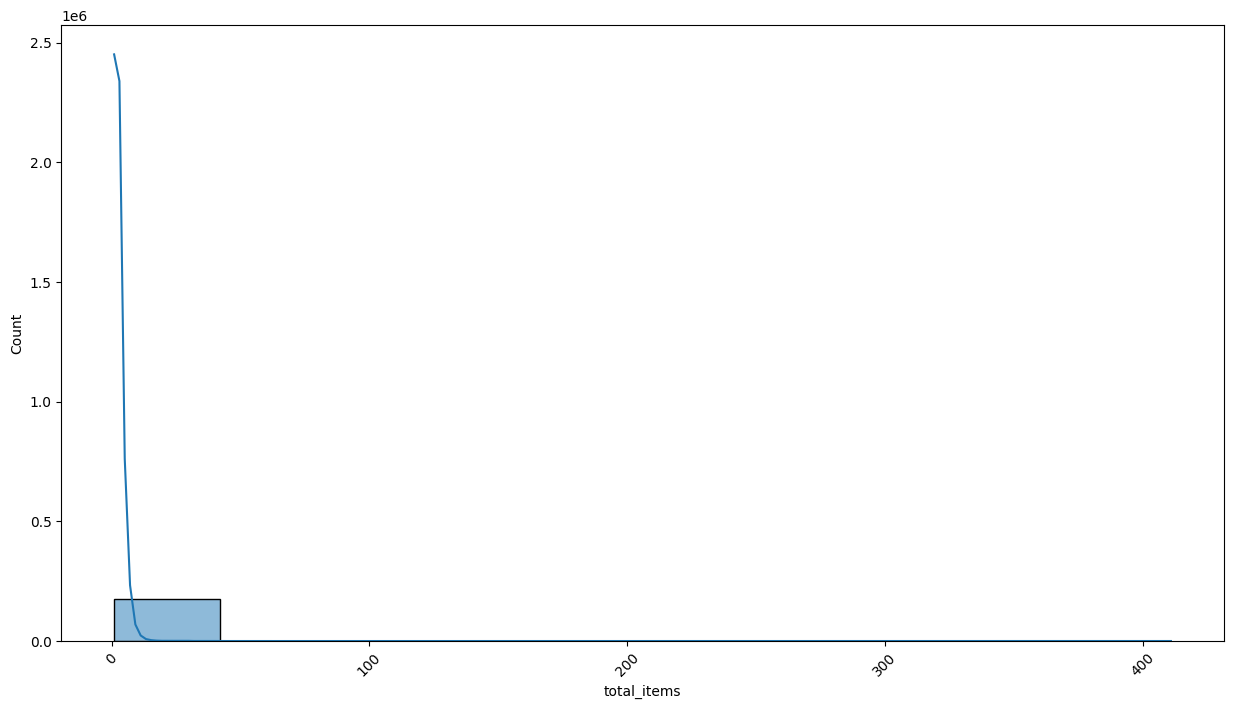

In [30]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="total_items", bins=10, data = df2, kde=True)
plt.show()

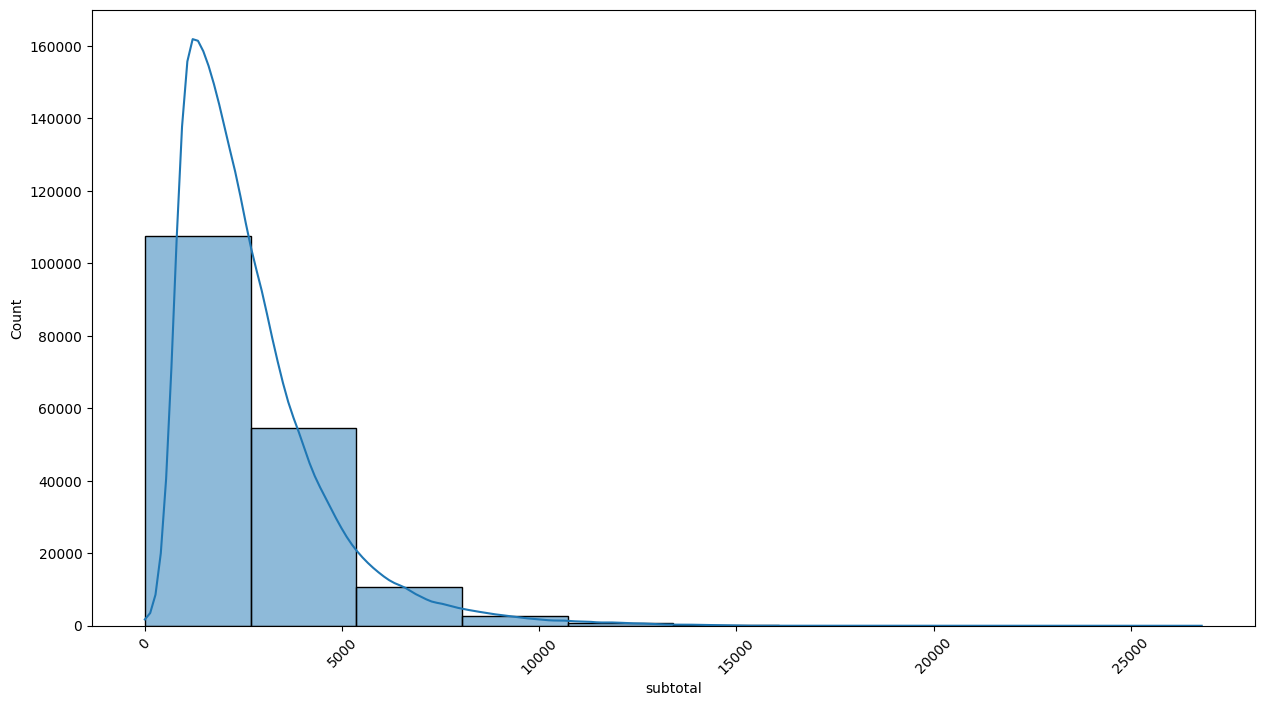

In [31]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="subtotal", bins=10, data = df2, kde=True)
plt.show()

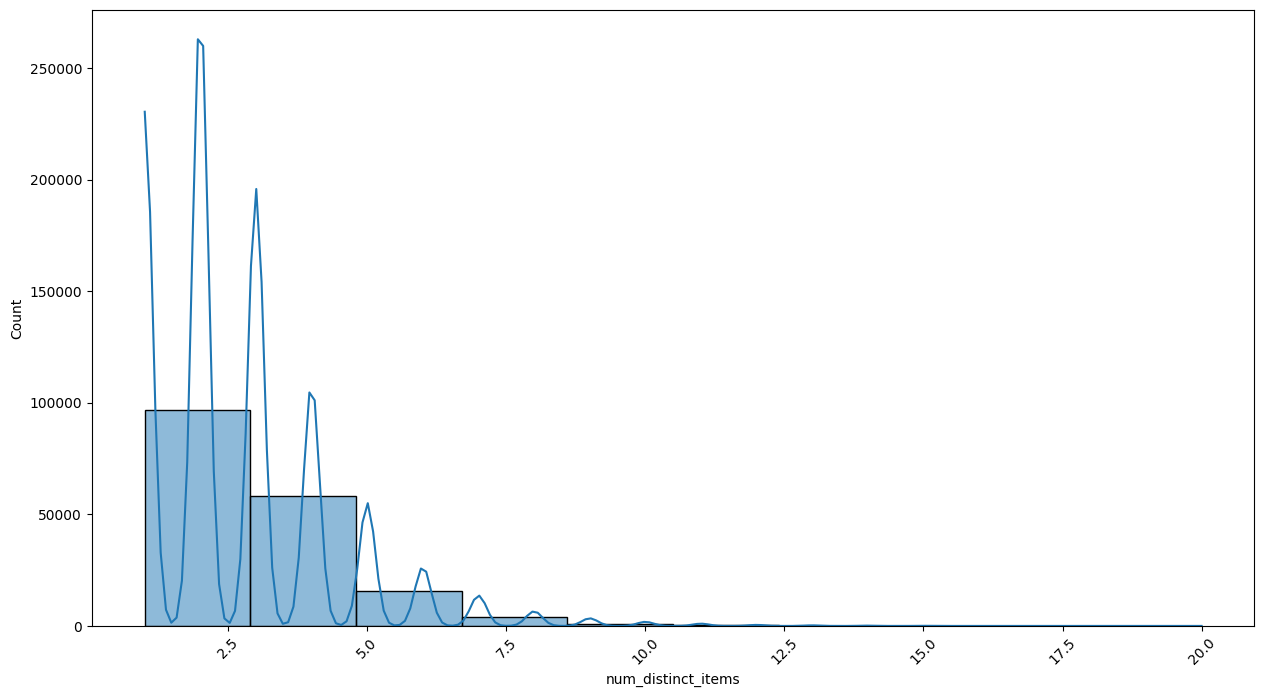

In [32]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="num_distinct_items", bins=10, data = df2, kde=True)
plt.show()

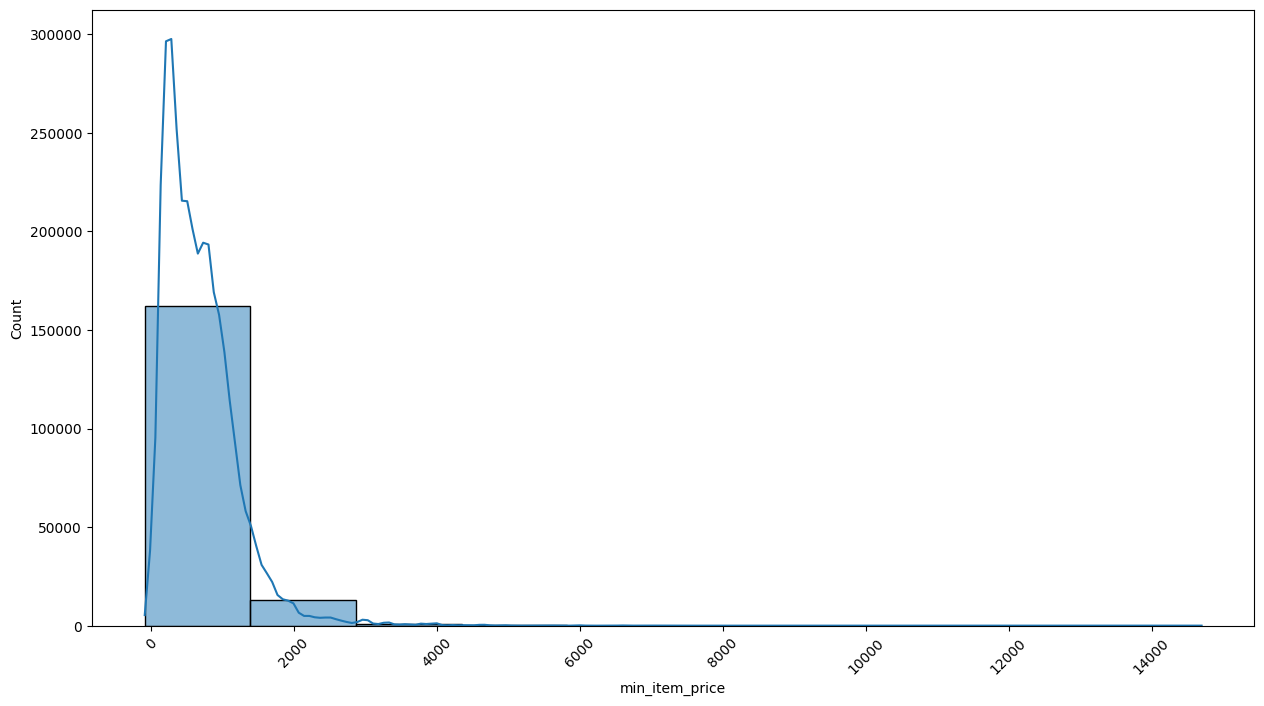

In [33]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="min_item_price", bins=10, data = df2, kde=True)
plt.show()

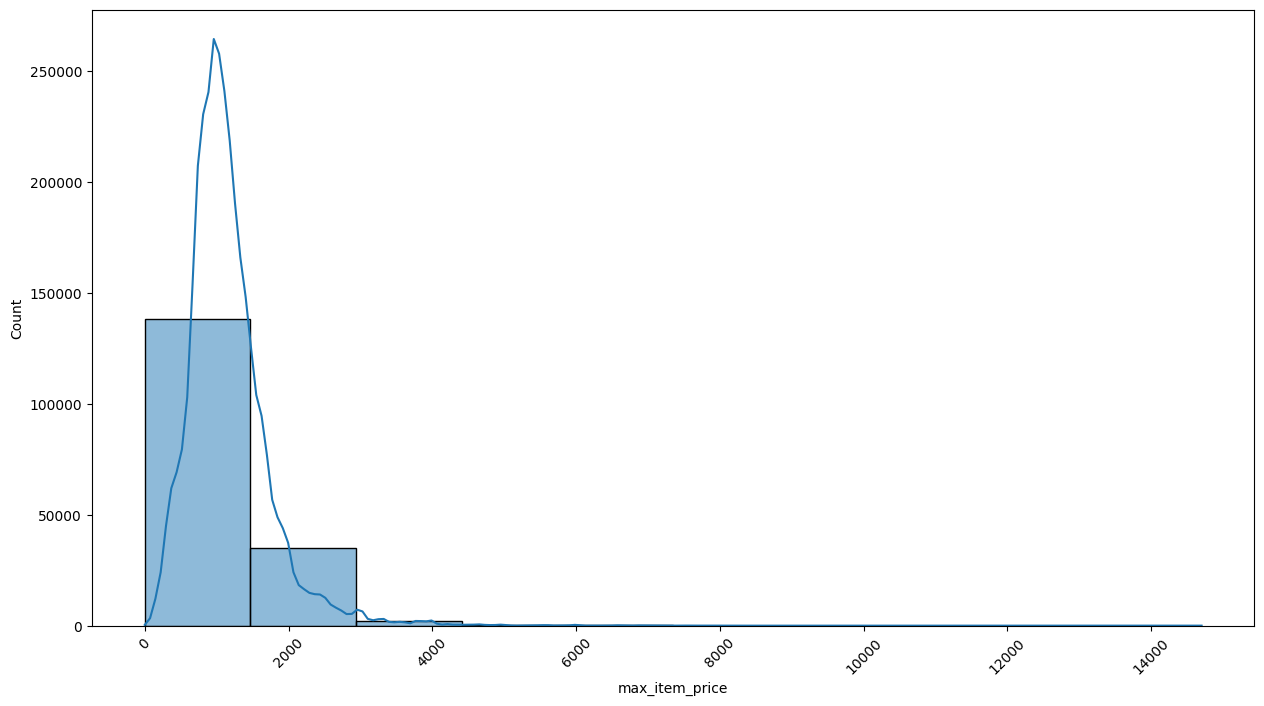

In [34]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="max_item_price", bins=10, data = df2, kde=True)
plt.show()

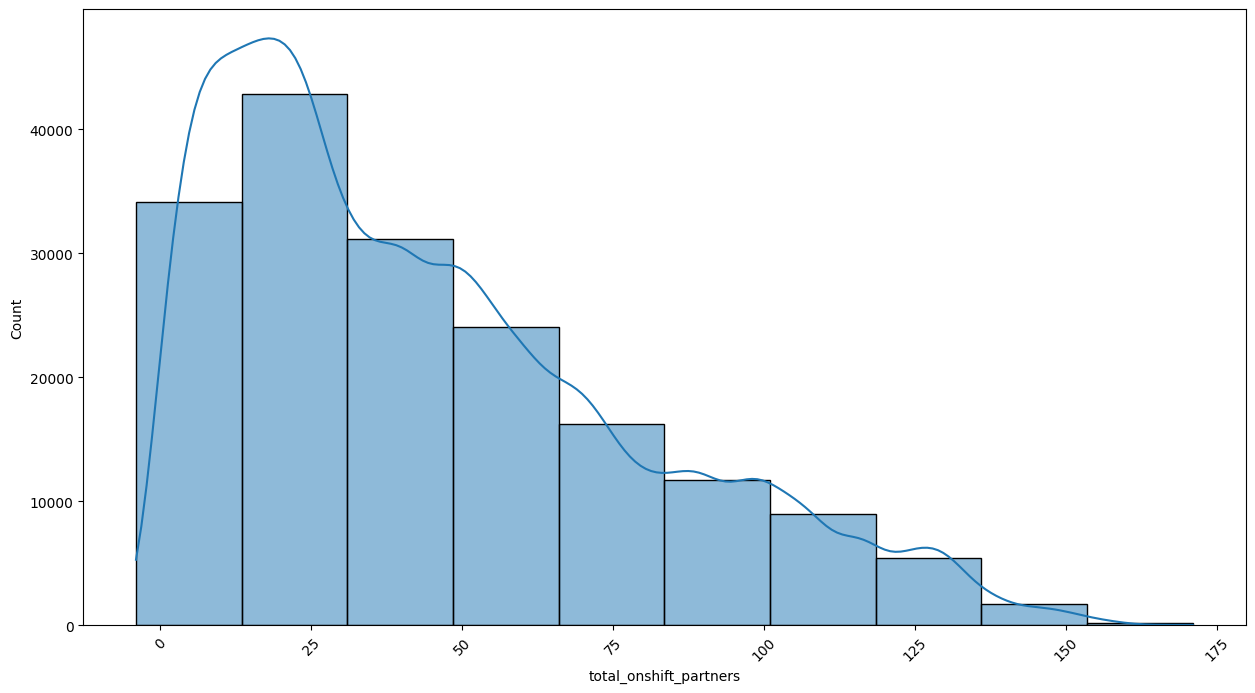

In [35]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="total_onshift_partners", bins=10, data = df2, kde=True)
plt.show()

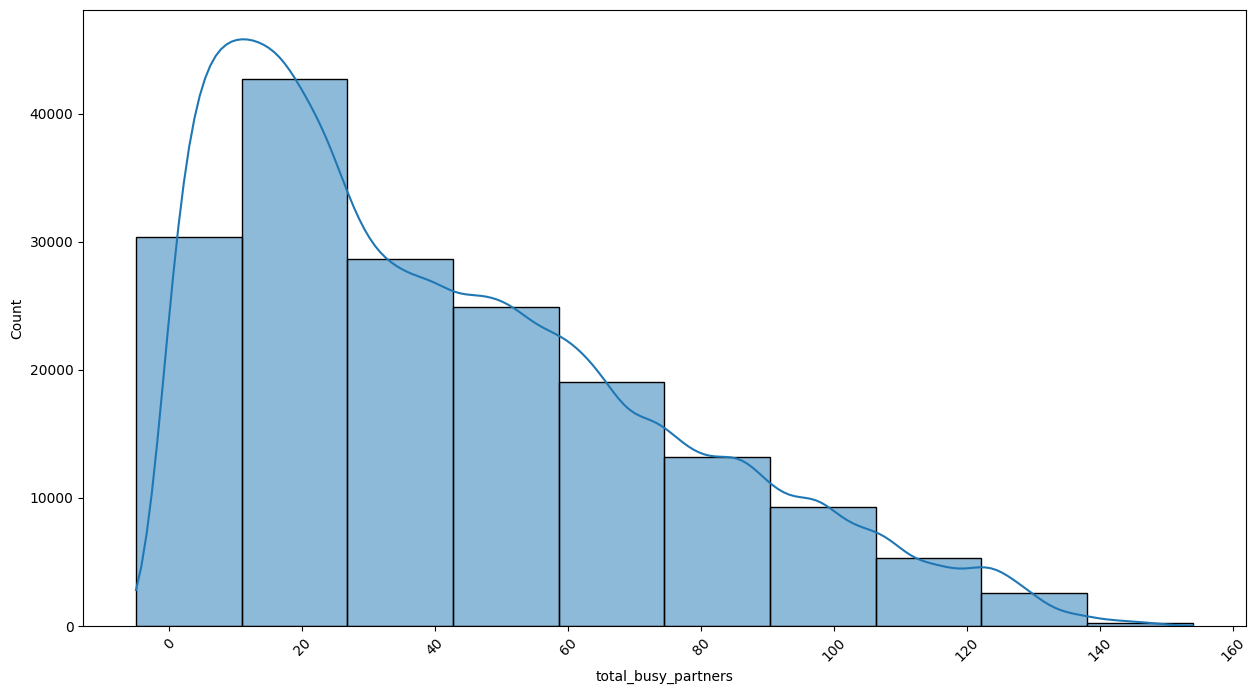

In [36]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="total_busy_partners", bins=10, data = df2, kde=True)
plt.show()

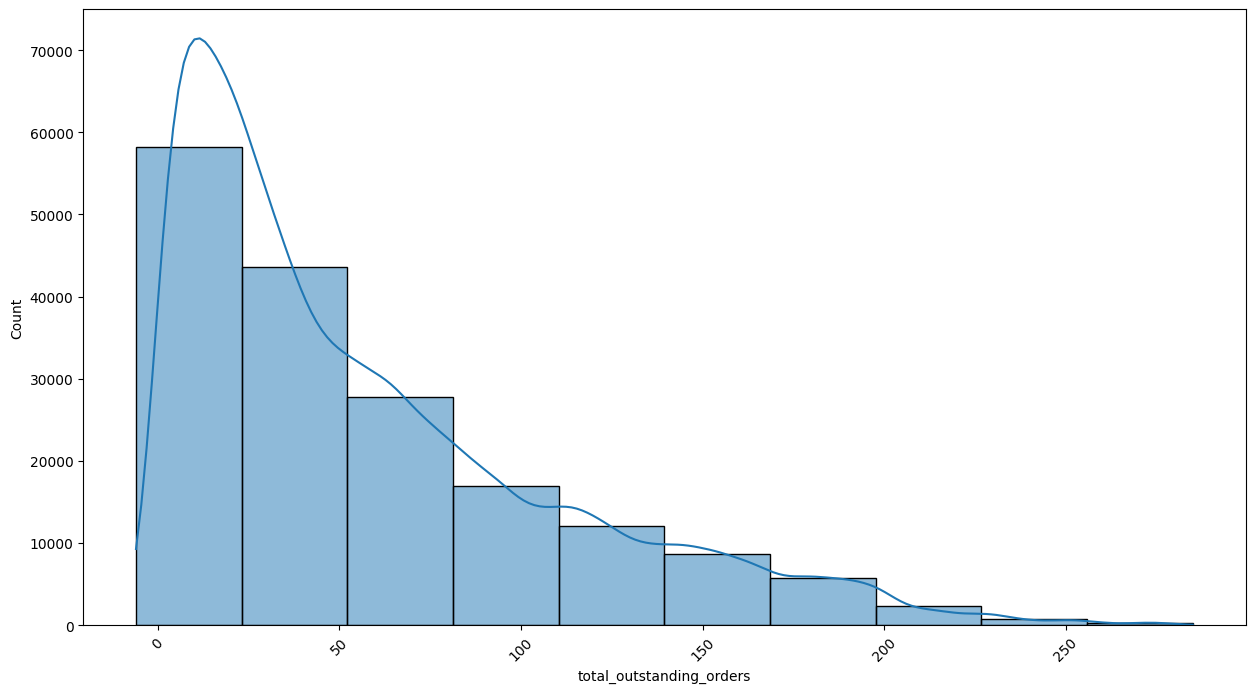

In [37]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="total_outstanding_orders", bins=10, data = df2, kde=True)
plt.show()

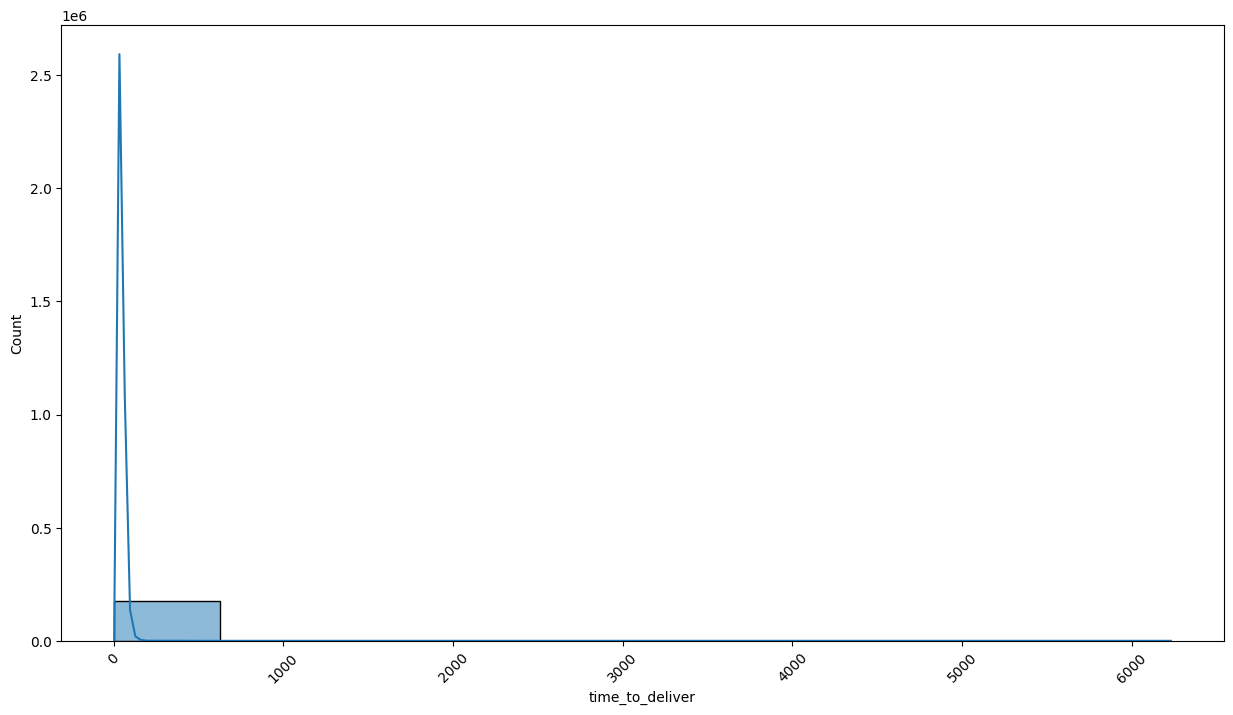

In [38]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="time_to_deliver", bins=10, data = df2, kde=True)
plt.show()

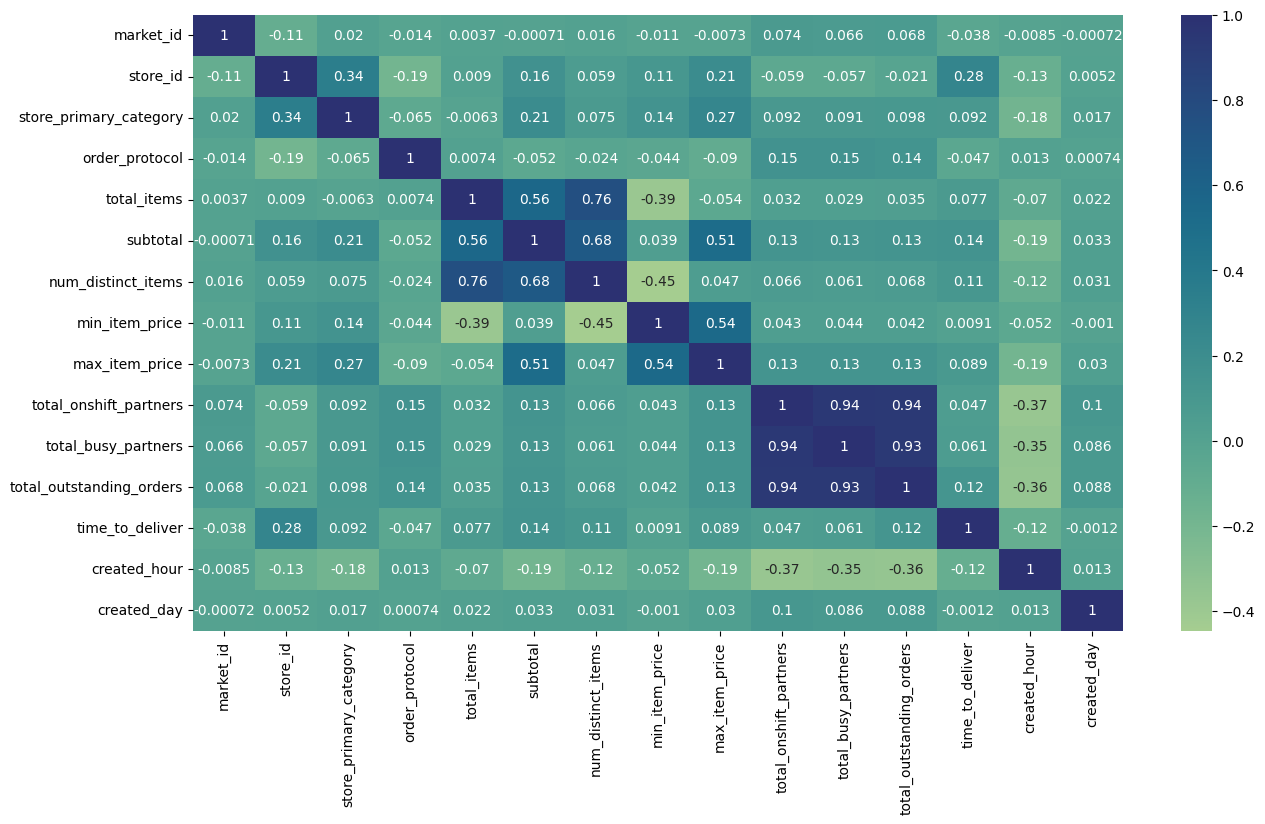

In [39]:

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.heatmap(df2.corr(),annot=True, cmap="crest")
plt.show()

In [40]:
df2.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_to_deliver,created_hour,created_day
0,1.0,49.744347,47.875225,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,47.620343,44.329778,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
8,2.0,47.620343,50.408414,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0
14,1.0,51.090884,50.287894,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3
15,1.0,51.090884,50.287894,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,2,1


## Check for outliers

<Axes: xlabel='subtotal'>

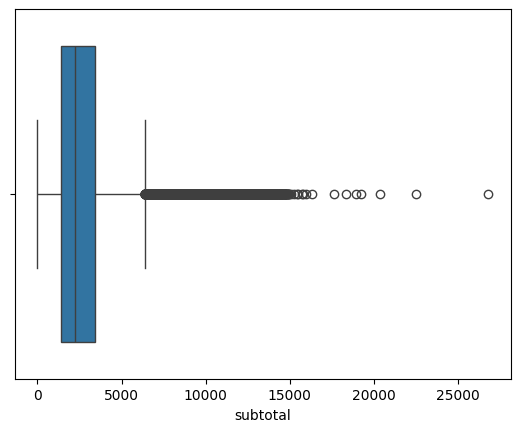

In [41]:
sns.boxplot(x=df2['subtotal'])

<Axes: xlabel='num_distinct_items'>

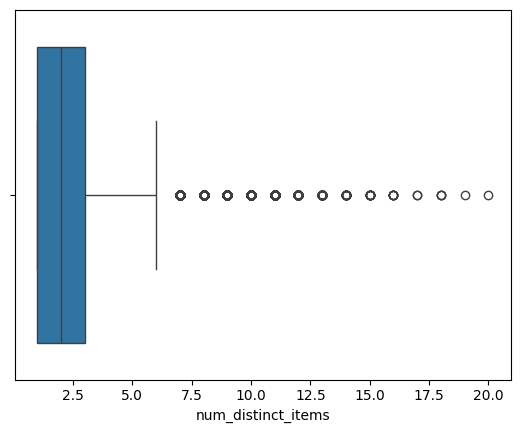

In [42]:
sns.boxplot(x=df2['num_distinct_items'])

<Axes: xlabel='total_onshift_partners'>

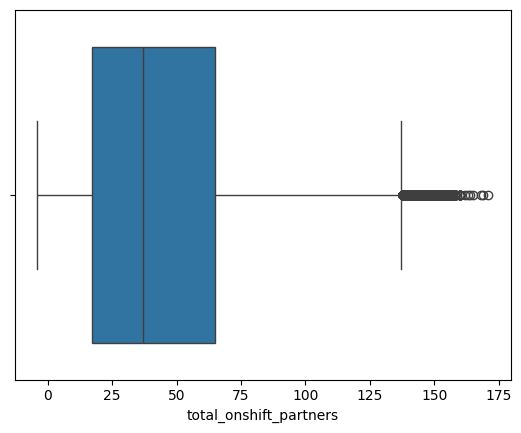

In [43]:
sns.boxplot(x=df2['total_onshift_partners'])

<Axes: xlabel='min_item_price'>

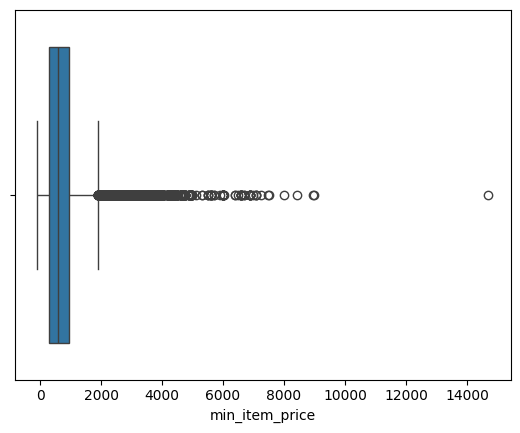

In [44]:
sns.boxplot(x=df2['min_item_price'])

<Axes: xlabel='total_items'>

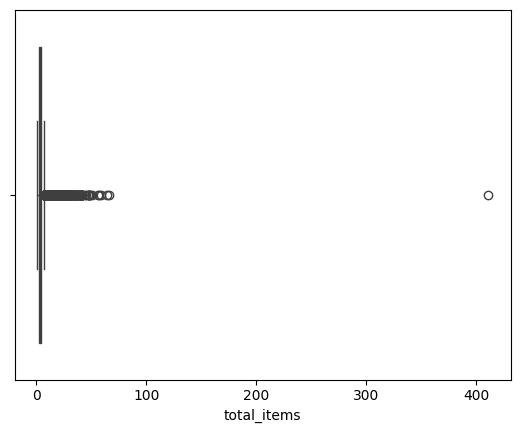

In [45]:
sns.boxplot(x=df2['total_items'])

## Remove outliers

In [46]:

Q1 = np.percentile(df2["total_items"], 25, interpolation = 'midpoint')
Q2 = np.percentile(df2["total_items"], 50, interpolation = 'midpoint')
Q3 = np.percentile(df2["total_items"], 75, interpolation = 'midpoint')
 
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
 
IQR = Q3 - Q1
print('Interquartile range is', IQR)
upperWhisker = Q3 + 1.5*IQR
print('upper limit',upperWhisker)



Q1 25 percentile of the given data is,  2.0
Q1 50 percentile of the given data is,  3.0
Q1 75 percentile of the given data is,  4.0
Interquartile range is 2.0
upper limit 7.0


In [47]:
df2.drop(df2[df2["total_items"]>upperWhisker].index , inplace=True)

<Axes: xlabel='total_items'>

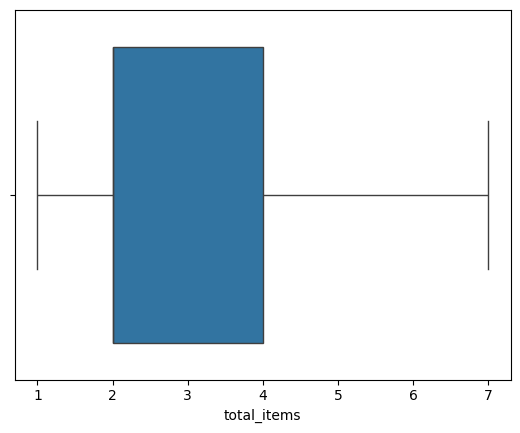

In [48]:
sns.boxplot(x=df2['total_items'])

In [49]:
Q1 = np.percentile(df2["num_distinct_items"], 25, interpolation = 'midpoint')
Q2 = np.percentile(df2["num_distinct_items"], 50, interpolation = 'midpoint')
Q3 = np.percentile(df2["num_distinct_items"], 75, interpolation = 'midpoint')
 
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
 
IQR = Q3 - Q1
print('Interquartile range is', IQR)
upperWhisker = Q3 + 1.5*IQR
print('upper limit',upperWhisker)

Q1 25 percentile of the given data is,  1.0
Q1 50 percentile of the given data is,  2.0
Q1 75 percentile of the given data is,  3.0
Interquartile range is 2.0
upper limit 6.0


In [50]:
df2.drop(df2[df2["num_distinct_items"]>upperWhisker].index , inplace=True)

<Axes: xlabel='num_distinct_items'>

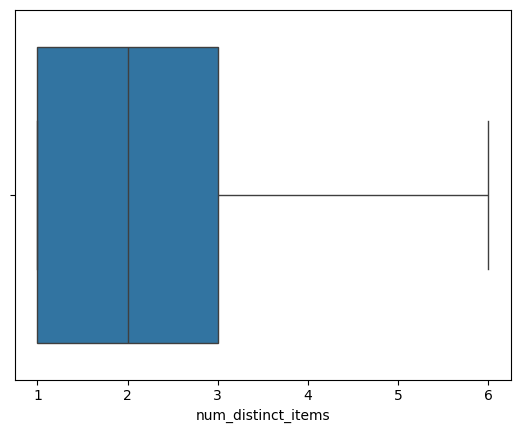

In [51]:
sns.boxplot(x=df2['num_distinct_items'])

In [52]:
Q1 = np.percentile(df2["total_onshift_partners"], 25, interpolation = 'midpoint')
Q2 = np.percentile(df2["total_onshift_partners"], 50, interpolation = 'midpoint')
Q3 = np.percentile(df2["total_onshift_partners"], 75, interpolation = 'midpoint')
 
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
 
IQR = Q3 - Q1
print('Interquartile range is', IQR)
upperWhisker = Q3 + 1.5*IQR
print('upper limit',upperWhisker)

Q1 25 percentile of the given data is,  17.0
Q1 50 percentile of the given data is,  37.0
Q1 75 percentile of the given data is,  65.0
Interquartile range is 48.0
upper limit 137.0


In [53]:
df2.drop(df2[df2["total_onshift_partners"]>upperWhisker].index , inplace=True)

<Axes: xlabel='total_onshift_partners'>

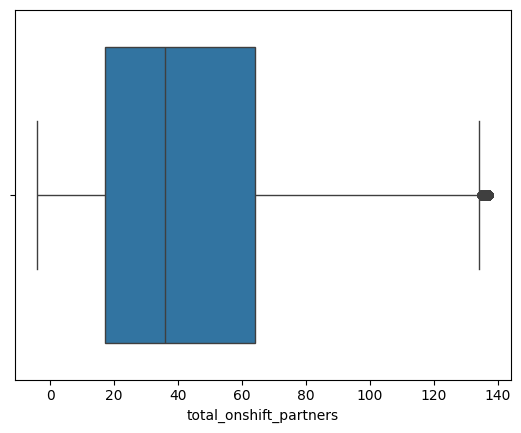

In [54]:
sns.boxplot(x=df2['total_onshift_partners'])

## Compare plots and results

- After dropping the data points the points which are above the Upper IQR the outliers are removed
- there is a clear correlation between the available and busy partners

# Regression with neural networks

## Data splitting

In [55]:
y = df2['time_to_deliver']
X = df2.drop('time_to_deliver', axis=1, inplace=False)
y.head()

0     62.983333
1     67.066667
8     26.433333
14    37.883333
15    49.800000
Name: time_to_deliver, dtype: float64

In [56]:
X.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_hour,created_day
0,1.0,49.744347,47.875225,1.0,4,3441,4,557,1239,33.0,14.0,21.0,22,4
1,2.0,47.620343,44.329778,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,21,1
8,2.0,47.620343,50.408414,3.0,4,4771,3,820,1604,8.0,6.0,18.0,0,0
14,1.0,51.090884,50.287894,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,3,3
15,1.0,51.090884,50.287894,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,2,1


## Data scaling

In [57]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [58]:
X

array([[-1.31098738,  0.34504254,  0.04450559, ..., -0.70152658,
         1.54016665,  0.38765359],
       [-0.56089627,  0.01803113, -1.36530016, ..., -1.07165687,
         1.42534624, -1.08073706],
       [-0.56089627,  0.01803113,  1.05179849, ..., -0.7599682 ,
        -0.98588227, -1.57020061],
       ...,
       [-1.31098738,  1.04872112, -1.58257626, ..., -0.33139629,
        -0.52660065,  0.87711714],
       [-1.31098738,  0.1135784 , -1.46507184, ..., -0.87685145,
         1.08088502,  1.36658069],
       [-1.31098738,  0.1135784 , -1.46507184, ..., -0.6625655 ,
         1.19570543,  1.36658069]])

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
X_train

array([[ 0.93928595,  1.71800783,  1.01068368, ..., -0.17555196,
        -0.98588227,  1.36658069],
       [-0.56089627,  2.61597274,  0.64522073, ..., -0.21451304,
         1.31052583,  1.36658069],
       [ 0.93928595,  1.62646536, -1.46507184, ..., -0.85737091,
         1.19570543, -1.08073706],
       ...,
       [-0.56089627,  0.84115004,  0.04450559, ...,  2.14263249,
        -0.75624146, -1.57020061],
       [-0.56089627, -0.17227342, -1.46507184, ..., -0.27295466,
        -0.98588227, -0.59127351],
       [-0.56089627, -0.6184421 ,  0.15826863, ...,  1.55821625,
        -0.52660065,  0.87711714]])

In [65]:
X_train.shape

(132248, 14)

In [76]:
y_train.shape

(132248,)

In [77]:
type(X_train)

numpy.ndarray

In [78]:
type(y_train)

pandas.core.series.Series

## Defining NN architecture

In [69]:
import tensorflow as tf  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import Adam

In [66]:
hidden_layer1 = 28
hidden_layer2 = 50
hidden_layer3 = 80
learning_rate = 0.01

model = Sequential([
    Dense(hidden_layer1, kernel_initializer='normal', activation='relu'),   
    Dense(hidden_layer2, kernel_initializer='normal', activation='relu'),
    Dense(hidden_layer3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])

In [70]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

In [81]:
history = model.fit(X_train, y_train.values, epochs=10, batch_size=13225)

Epoch 1/10
10/10 [==============================] - 1s 19ms/step - loss: 9.9346 - mean_squared_logarithmic_error: 9.9345
Epoch 2/10
10/10 [==============================] - 0s 17ms/step - loss: 0.5985 - mean_squared_logarithmic_error: 0.5985
Epoch 3/10
10/10 [==============================] - 0s 17ms/step - loss: 0.8152 - mean_squared_logarithmic_error: 0.8152
Epoch 4/10
10/10 [==============================] - 0s 19ms/step - loss: 0.4175 - mean_squared_logarithmic_error: 0.4175
Epoch 5/10
10/10 [==============================] - 0s 17ms/step - loss: 0.1520 - mean_squared_logarithmic_error: 0.1520
Epoch 6/10
10/10 [==============================] - 0s 18ms/step - loss: 0.1586 - mean_squared_logarithmic_error: 0.1586
Epoch 7/10
10/10 [==============================] - 0s 22ms/step - loss: 0.1219 - mean_squared_logarithmic_error: 0.1219
Epoch 8/10
10/10 [==============================] - 0s 17ms/step - loss: 0.1197 - mean_squared_logarithmic_error: 0.1197
Epoch 9/10
10/10 [==============

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                420       
                                                                 
 dense_1 (Dense)             (None, 50)                1450      
                                                                 
 dense_2 (Dense)             (None, 80)                4080      
                                                                 
 dense_3 (Dense)             (None, 1)                 81        
                                                                 
Total params: 6,031
Trainable params: 6,031
Non-trainable params: 0
_________________________________________________________________


## Trying different combinations and hyperparameters

In [90]:
hidden_layer1 = 40
hidden_layer2 = 100
hidden_layer3 = 90
learning_rate = 0.01

model = Sequential([
    Dense(hidden_layer1, kernel_initializer='normal', activation='relu'),   
    Dense(hidden_layer2, kernel_initializer='normal', activation='relu'),
    Dense(hidden_layer3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])

In [91]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

## Model training

In [92]:
history = model.fit(X_train, y_train.values, epochs=100, batch_size=1323)

Epoch 1/100
100/100 [==============================] - 3s 7ms/step - loss: 0.9221 - mean_squared_logarithmic_error: 0.9218
Epoch 2/100
100/100 [==============================] - 1s 8ms/step - loss: 0.0980 - mean_squared_logarithmic_error: 0.0980
Epoch 3/100
100/100 [==============================] - 1s 8ms/step - loss: 0.0929 - mean_squared_logarithmic_error: 0.0929
Epoch 4/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0904 - mean_squared_logarithmic_error: 0.0904
Epoch 5/100
100/100 [==============================] - 1s 9ms/step - loss: 0.0889 - mean_squared_logarithmic_error: 0.0889
Epoch 6/100
100/100 [==============================] - 1s 9ms/step - loss: 0.0880 - mean_squared_logarithmic_error: 0.0880
Epoch 7/100
100/100 [==============================] - 1s 8ms/step - loss: 0.0875 - mean_squared_logarithmic_error: 0.0875
Epoch 8/100
100/100 [==============================] - 1s 10ms/step - loss: 0.0872 - mean_squared_logarithmic_error: 0.0872
Epoch 9/100
100

In [93]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                600       
                                                                 
 dense_5 (Dense)             (None, 100)               4100      
                                                                 
 dense_6 (Dense)             (None, 90)                9090      
                                                                 
 dense_7 (Dense)             (None, 1)                 91        
                                                                 
Total params: 13,881
Trainable params: 13,881
Non-trainable params: 0
_________________________________________________________________
